#Kidney Stone detection

Name: Karan Patel C075 70321018113, 
Nirav Pipalia C078 70321018066

Division: C
Course: Btech (Integrated)
Semester: 9

Aim: To highlight kidney stone in the given image

Analysis of the code: 
1. Importing all the necessary libraries like numpy, matplotlib, sklearn etc.
2. Loading the images
3. Performed thresholding on the given image using the inbuilt function.
4. Removed noise using morphological techniques (opening).
5. Finding the sure areas using dilation.
6. Computing the unknown areas by subtracting the sure areas from the thresholded image.
7. Used the marker labeling and highlighted the unknown regions so as to neglect the sure regions by keeping the value of the sure regions 1 and unknown regions 0.
8. Used watershed functionality to highlight the unknown areas with red marking.
9. Plotted all the images using the matplotlib library.



(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

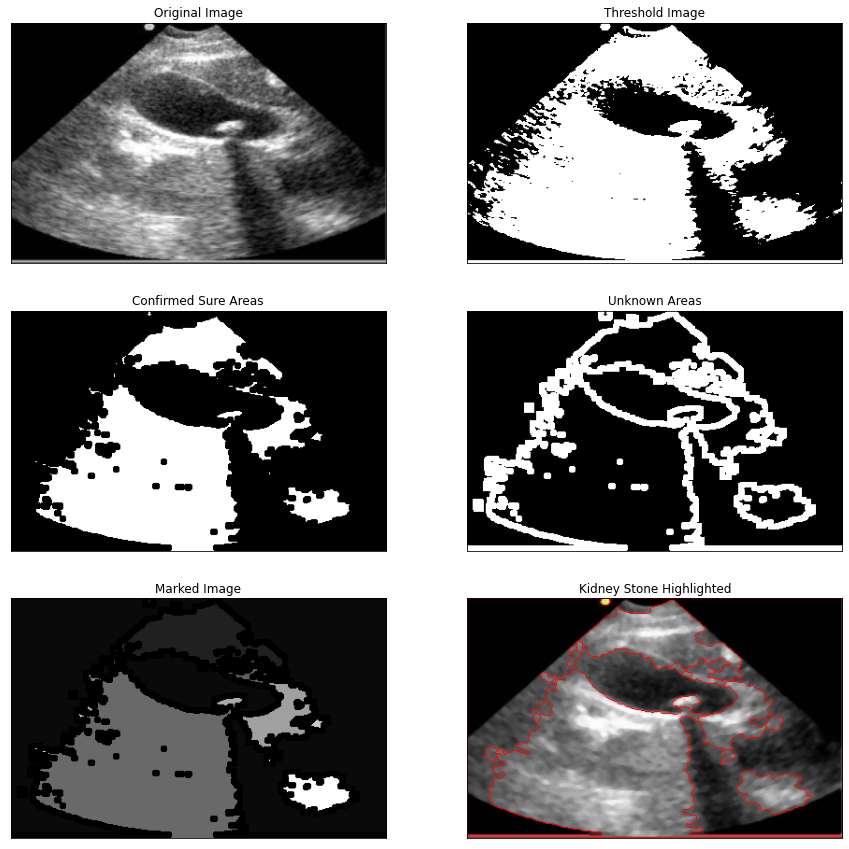

In [ ]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('image2.jpg',0)

plt.figure(figsize=(15,15))
plt.subplot(321),plt.imshow(img,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(322),plt.imshow(thresh,'gray')
plt.title('Threshold Image')
plt.xticks([]),plt.yticks([])


kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


sure_bg = cv2.dilate(opening,kernel,iterations=3)


dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(323),plt.imshow(sure_fg,'gray')
plt.title('Confirmed Sure Areas')
plt.xticks([]),plt.yticks([])

plt.subplot(324),plt.imshow(unknown,'gray')
plt.title('Unknown Areas')
plt.xticks([]),plt.yticks([])


ret, markers = cv2.connectedComponents(sure_fg)


markers = markers+1


markers[unknown==255] = 0


plt.subplot(325),plt.imshow(markers,'gray')
plt.title('Marked Image')
plt.xticks([]),plt.yticks([])

img = cv2.imread('image2.jpg',1)
img = cv2.medianBlur(img,5)
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(326)
plt.imshow(img,'gray')
plt.title('Kidney Stone Highlighted')
plt.xticks([]),plt.yticks([])

#Conclusion: 
We successfully compiled a code to highlight possible kidney stones in a sonogram image by using multiple image processing techniques.   